In [259]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
import random
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn.svm import SVC
from random import seed, randint
from sklearn.metrics import f1_score
from scipy.stats import randint
from scipy.stats import uniform
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import StratifiedKFold 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import Imputer 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, confusion_matrix, recall_score

In [260]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
Id = test_df['PassengerId']


In [261]:
#remove Y variable
y = train_df["Survived"]
train_df = train_df.drop(["Survived"], axis = 1)

In [262]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.6+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-nul

In [263]:
#Split data into categorical and numeric subsets
cat_df_train = train_df.select_dtypes(include=[object])
cat_df_test = test_df.select_dtypes(include=[object])

numeric_df = train_df.select_dtypes(exclude=[object])
numeric_df_test = test_df.select_dtypes(exclude=[object])

### Numerical Features EDA


In [264]:
numeric_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(numeric_df, diagonal="kde", alpha = 0.2, figsize=(8, 8))
plt.tight_layout()
plt.show()

In [265]:
# Numeric features correlation with survived
numeric_df.corrwith(y, axis=0, drop=False)

PassengerId   -0.005007
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
dtype: float64

### Numerical Features EDA Findings
    1. Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224).

    2. PassengerId - No correlation with other features and can be removed.

    3. SibSp and Parch - Most passengers did not travel with parents or children.

    4. Fare - 75 percentile is \$31 and Max is \$512.

    5. Age - incomplete as it is missing 177 records.  

    6. Pclass - negative correlation to survival.

    7. Fare - positive correlation to survival.

    8. PassengerId is not correlated to survival and can be dropped.

### Categorical Features EDA


In [266]:
cat_df_train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


### Categorical Features EDA Findings

    1. Name - Similar to PassengerId contains no unique value to survival.

    2. Gender - 65% (577) of the passengers are male.

    3. Ticket - There are 210 missing values in ticket or multiple people were purchased on the same ticket.
    
    4. Cabin - 687 null values.
    
    5. Embarked - 3 ports where passengers boarded the Titantic.

### Data Cleaning - Drop Features

EDA taught us that the following adjustments can be made to the dataset:

    1. Age: Impute median for 177 missing values.
    2. Cabin: Delete feature because of incomplete data.
    3. PassengerId: Delete feature because of lack of correlation.
    4. Name: Delete feature because of lack of correlation.
    5. Ticket: Delete because of missing data and fare class

In [267]:
numeric_df = numeric_df.drop(["PassengerId"], axis = 1)

In [268]:
numeric_df_test = numeric_df_test.drop(["PassengerId"], axis = 1)

In [269]:
cat_df_train = cat_df_train.drop(["Name", "Ticket", "Cabin"], axis = 1)

In [270]:
cat_df_test = cat_df_test.drop(["Name", "Ticket", "Cabin"], axis = 1)

### Train and Test One Hot Encoding

In [271]:
cat_df_train_encoded = pd.get_dummies(cat_df_train)
#print(features)
#print(features.shape)
                     
#Print the number of features after one-hot encoding
encoded = list(cat_df_train_encoded.columns)
print "{} total features after one-hot encoding.".format(len(encoded))

print cat_df_train_encoded.head()

5 total features after one-hot encoding.
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           0           1
1           1         0           1           0           0
2           1         0           0           0           1
3           1         0           0           0           1
4           0         1           0           0           1


In [272]:
cat_df_train_encoded = pd.DataFrame(cat_df_train_encoded)

In [273]:
cat_df_test_encoded = pd.get_dummies(cat_df_test)
#print(features)
#print(features.shape)
                     
#Print the number of features after one-hot encoding
encoded_test = list(cat_df_test_encoded.columns)
print "{} total features after one-hot encoding.".format(len(encoded_test))

print cat_df_test_encoded.head()

5 total features after one-hot encoding.
   Sex_female  Sex_male  Embarked_C  Embarked_Q  Embarked_S
0           0         1           0           1           0
1           1         0           0           0           1
2           0         1           0           1           0
3           0         1           0           0           1
4           1         0           0           0           1


In [274]:
cat_df_test_encoded = pd.DataFrame(cat_df_test_encoded)

### Train and Test Mean Imputing

In [275]:
from sklearn.preprocessing import Imputer

In [276]:
from sklearn.base import BaseEstimator, TransformerMixin
# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]
        

In [277]:
num_attribs = list(numeric_df)
num_attribs_array = np.asarray(num_attribs)
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median"))  
])


#### Train

In [278]:
prepared_num_df_train  = num_pipeline.fit_transform(numeric_df)

In [279]:
prepared_num_df_train = pd.DataFrame(prepared_num_df_train)

In [280]:
prepared_num_df_train.rename(columns={
    0 : 'Pclass',
    1: 'Age',
    2: 'SibSp',
    3: 'Parch',
    4: 'Fare'
  },
  inplace=True)

In [281]:
prepared_num_df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Pclass    891 non-null float64
Age       891 non-null float64
SibSp     891 non-null float64
Parch     891 non-null float64
Fare      891 non-null float64
dtypes: float64(5)
memory usage: 34.9 KB


#### Test

In [282]:
prepared_num_df_test  = num_pipeline.fit_transform(numeric_df_test)

In [283]:
prepared_num_df_test = pd.DataFrame(prepared_num_df_test)

In [284]:
prepared_num_df_test.rename(columns={
    0 : 'Pclass',
    1: 'Age',
    2: 'SibSp',
    3: 'Parch',
    4: 'Fare'
  },
  inplace=True)

### Train and Test combine categorical (one hot encoded) and numeric columns

#### Train

In [285]:
frames_train = [prepared_num_df_train, cat_df_train_encoded]

In [286]:
X_merged = pd.concat(frames_train, axis = 1)

In [287]:
X_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null float64
Age           891 non-null float64
SibSp         891 non-null float64
Parch         891 non-null float64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(5), uint8(5)
memory usage: 39.2 KB


#### Test


In [288]:
frames_test = [prepared_num_df_test, cat_df_test_encoded]

In [289]:
Test_merged = pd.concat(frames_test, axis = 1)

In [290]:
Test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
Pclass        418 non-null float64
Age           418 non-null float64
SibSp         418 non-null float64
Parch         418 non-null float64
Fare          418 non-null float64
Sex_female    418 non-null uint8
Sex_male      418 non-null uint8
Embarked_C    418 non-null uint8
Embarked_Q    418 non-null uint8
Embarked_S    418 non-null uint8
dtypes: float64(5), uint8(5)
memory usage: 18.4 KB


### Train and Test Feature Creation

#### Train

In [291]:
X_merged["RelativesOnboard"] = X_merged["SibSp"] + X_merged["Parch"]
#test_data["RelativesOnboard"] = test_data["SibSp"] + test_data["Parch"]

X_merged["AgeBucket"] = X_merged["Age"] // 15 * 15
#test_data["AgeBucket"] = test_data["Age"] // 15 * 15

In [292]:
X_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Pclass              891 non-null float64
Age                 891 non-null float64
SibSp               891 non-null float64
Parch               891 non-null float64
Fare                891 non-null float64
Sex_female          891 non-null uint8
Sex_male            891 non-null uint8
Embarked_C          891 non-null uint8
Embarked_Q          891 non-null uint8
Embarked_S          891 non-null uint8
RelativesOnboard    891 non-null float64
AgeBucket           891 non-null float64
dtypes: float64(7), uint8(5)
memory usage: 53.1 KB


#### Test

In [293]:
Test_merged["RelativesOnboard"] = Test_merged["SibSp"] + Test_merged["Parch"]

Test_merged["AgeBucket"] = Test_merged["Age"] // 15 * 15


In [294]:
Test_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
Pclass              418 non-null float64
Age                 418 non-null float64
SibSp               418 non-null float64
Parch               418 non-null float64
Fare                418 non-null float64
Sex_female          418 non-null uint8
Sex_male            418 non-null uint8
Embarked_C          418 non-null uint8
Embarked_Q          418 non-null uint8
Embarked_S          418 non-null uint8
RelativesOnboard    418 non-null float64
AgeBucket           418 non-null float64
dtypes: float64(7), uint8(5)
memory usage: 25.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000FD8CB38>]], dtype=object)

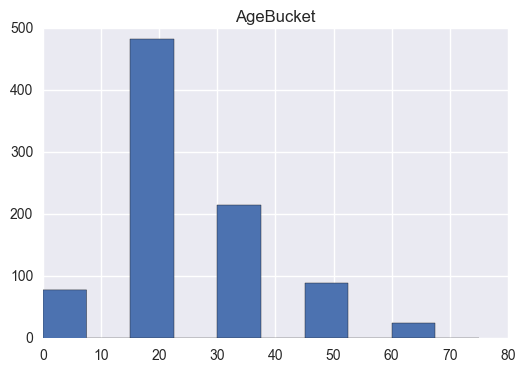

In [295]:
sns.set(color_codes=True)
%matplotlib inline
X_merged.hist(column = "AgeBucket")

In [296]:
sss = StratifiedKFold(n_splits = 4, random_state=42)
kfold = KFold(n_splits=10, random_state=seed)
num_trees = 100
num_folds = 10
scoring = 'roc_auc'
seed = 7
scaler = MinMaxScaler(feature_range=(0, 1))

In [297]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split = \
    train_test_split(X_merged, y, test_size=0.3, random_state=42)

In [298]:
# base case

# Spot-Check Algorithms
LR_clf = LogisticRegression()
LDA_clf = LinearDiscriminantAnalysis()
KNN_clf = KNeighborsClassifier()
RF_clf = RandomForestClassifier(random_state = 7)
NB_clf = GaussianNB()
SVC_clf = SVC()
ADA_clf = AdaBoostClassifier(random_state = 7)
GB_clf = GradientBoostingClassifier(random_state = 7)

models = []
models.append(('LR', LR_clf))
models.append(('LDA', LDA_clf))
models.append(('KNN', KNN_clf))
models.append(('RF',RF_clf))
models.append(('NB', NB_clf))
models.append(('SVM', SVC_clf))
models.append(('ADA', ADA_clf))
models.append(('GB', GB_clf))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=sss, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.840058 (0.024047)
LDA: 0.840357 (0.026125)
KNN: 0.709419 (0.017143)
RF: 0.824115 (0.013988)
NB: 0.820844 (0.026151)
SVM: 0.758228 (0.025840)
ADA: 0.827800 (0.013152)
GB: 0.848920 (0.020749)


In [299]:
#Scaled

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),('LR',LR_clf)])))
pipelines.append(('LDA', Pipeline([('Scaler', scaler),('LDA',LDA_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),('RF',RF_clf)])))
pipelines.append(('NB', Pipeline([('Scaler', scaler),('NB',NB_clf)])))
pipelines.append(('SVM', Pipeline([('Scaler', scaler),('SVM', SVC_clf)])))
pipelines.append(('ADA', Pipeline([('Scaler', scaler),('ADA', ADA_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),('GB', GB_clf)])))
results_sss = []
names_sss = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=sss, scoring=scoring)
    results_sss.append(cv_results)
    names_sss.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.837247 (0.029542)
LDA: 0.840357 (0.026125)
KNN: 0.826600 (0.015527)
RF: 0.824877 (0.014225)
NB: 0.820844 (0.026151)
SVM: 0.846588 (0.017224)
ADA: 0.827580 (0.013227)
GB: 0.848920 (0.020749)


In [300]:
#Kbest


pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("Kbest",skb),('LR',LR_clf)])))
pipelines.append(('LDA', Pipeline([('Scaler', scaler),("Kbest",skb),('LDA',LDA_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("Kbest",skb),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("Kbest",skb),('RF',RF_clf)])))
pipelines.append(('NB', Pipeline([('Scaler', scaler),("Kbest",skb),('NB',NB_clf)])))
pipelines.append(('SVM', Pipeline([('Scaler', scaler),("Kbest",skb),('SVM', SVC_clf)])))
pipelines.append(('ADA', Pipeline([('Scaler', scaler),("Kbest",skb),('ADA', ADA_clf)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("Kbest",skb),('GB', GB_clf)])))
results_kbest_tuned = []
names_kbest_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=sss, scoring=scoring)
    results_kbest_tuned.append(cv_results)
    names_kbest_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.827695 (0.033746)
LDA: 0.829626 (0.036069)
KNN: 0.832157 (0.023896)
RF: 0.845847 (0.028527)
NB: 0.814001 (0.039999)
SVM: 0.827239 (0.036955)
ADA: 0.830799 (0.038276)
GB: 0.857203 (0.024586)


In [322]:
#Tuned

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("Kbest",skb),('LR',LR_clf_tuned)])))
pipelines.append(('LDA', Pipeline([('Scaler', scaler),("Kbest",skb),('LDA',LDA_clf_tuned)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("Kbest",skb),('KNN',KNN_clf_tuned)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("Kbest",skb),('RF',RF_clf_tuned)])))
pipelines.append(('NB', Pipeline([('Scaler', scaler),("Kbest",skb),('NB',NB_clf)])))
pipelines.append(('SVM', Pipeline([('Scaler', scaler),("Kbest",skb),('SVM', SVC_clf_tuned)])))
pipelines.append(('ADA', Pipeline([('Scaler', scaler),("Kbest",skb),('ADA', ADA_clf_tuned)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("Kbest",skb),('GB', GB_clf_tuned)])))
results_tuned = []
names_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=sss, scoring=scoring)
    results_tuned.append(cv_results)
    names_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.828839 (0.033438)
LDA: 0.829743 (0.035713)
KNN: 0.832157 (0.023896)
RF: 0.839210 (0.029825)
NB: 0.814001 (0.039999)
SVM: 0.827239 (0.036955)
ADA: 0.829348 (0.040003)
GB: 0.858970 (0.029812)


In [227]:
# PCA

pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', scaler),("pca",pca),('LR',LR_clf)])))
pipelines.append(('LDA', Pipeline([('Scaler', scaler),("pca",pca),('LDA',LDA_clf)])))
pipelines.append(('KNN', Pipeline([('Scaler', scaler),("pca",pca),('KNN',KNN_clf)])))
pipelines.append(('RF', Pipeline([('Scaler', scaler),("pca",pca),('RF',RF_clf)])))
pipelines.append(('NB', Pipeline([('Scaler', scaler),("pca",pca),('NB',NB_clf)])))
pipelines.append(('SVM', Pipeline([('Scaler', scaler),("pca",pca),('SVM', SVC_clf_tuned)])))
pipelines.append(('ADA', Pipeline([('Scaler', scaler),("pca",pca),('ADA', ADA_clf_tuned)])))
pipelines.append(('GB', Pipeline([('Scaler', scaler),("pca",pca),('GB', GB_clf_tuned)])))


results_pca_tuned = []
names_pca_tuned = []
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=sss, scoring=scoring)
    results_pca_tuned.append(cv_results)
    names_pca_tuned.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.837289 (0.029321)
LDA: 0.840181 (0.025961)
KNN: 0.824269 (0.013184)
RF: 0.813612 (0.018506)
NB: 0.821429 (0.035401)
SVM: 0.844957 (0.018607)
ADA: 0.797146 (0.022590)
GB: 0.832897 (0.006846)


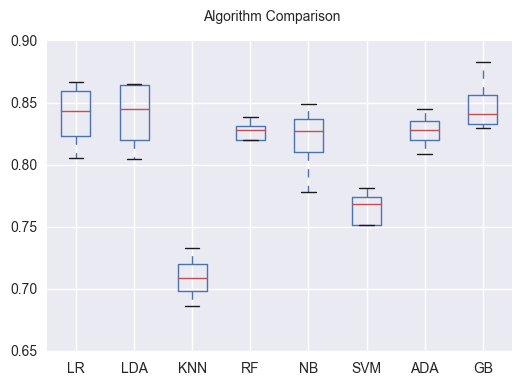

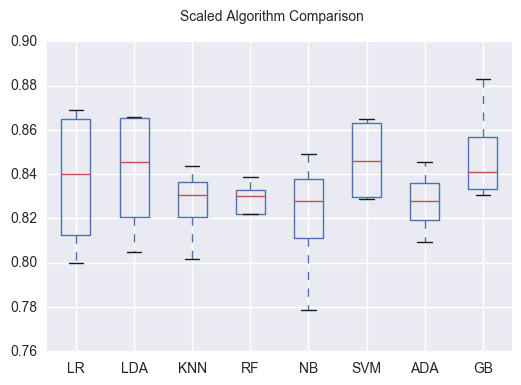

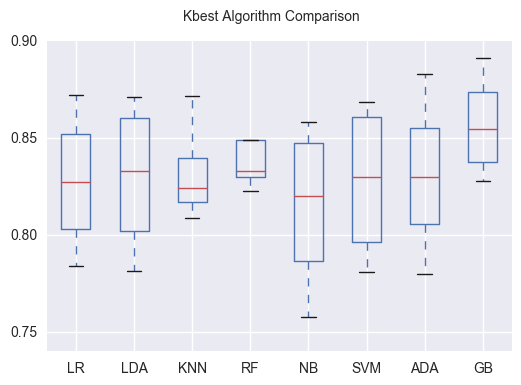

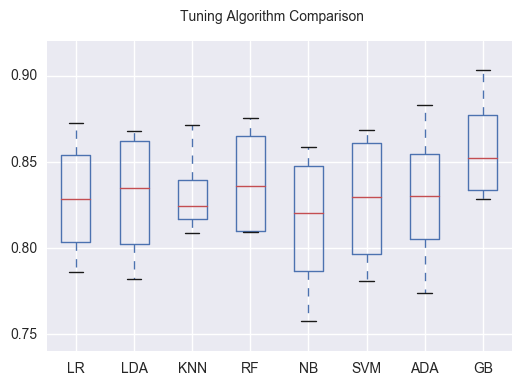

In [323]:
#Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Compare Algorithms Scaled
fig_sss = plt.figure()
fig_sss.suptitle('Scaled Algorithm Comparison')
ax = fig_sss.add_subplot(111)
plt.boxplot(results_sss)
ax.set_xticklabels(names_sss)
plt.show()

# Compare Algorithms
fig_kbest = plt.figure()
fig_kbest.suptitle('Kbest Algorithm Comparison')
ax = fig_kbest.add_subplot(111)
plt.boxplot(results_kbest_tuned)
ax.set_xticklabels(names_kbest_tuned)
plt.show()
'''
# Compare Algorithms
fig_pca_tuned = plt.figure()
fig_pca_tuned.suptitle('PCA Algorithm Comparison')
ax = fig_pca_tuned.add_subplot(111)
plt.boxplot(results_pca_tuned)
ax.set_xticklabels(names_pca_tuned)
plt.show()
'''
# Compare Algorithms
fig_tune = plt.figure()
fig_tune.suptitle('Tuning Algorithm Comparison')
ax = fig_tune.add_subplot(111)
plt.boxplot(results_tuned)
ax.set_xticklabels(names_tuned)
plt.show()





### Data Preparation

In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as 'capital-gain' or 'capital-loss' above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

In [325]:
# scale data between 0 and 1
scaler.fit(X_train)
X_train_scaled =scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [302]:
kbest_pipeline = Pipeline([
        ('KBest', SelectKBest(k=6)),
        ('clf',RF_clf) #GaussianNB()) RandomForestClassifier(random_state=42))
         ])
param_distribs_kbest = {
    'KBest__k' : range(1,12)
    }
grid_search = GridSearchCV(kbest_pipeline, param_grid=param_distribs_kbest, cv=sss,
                       scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.845768825514
Pipeline(memory=None,
     steps=[('KBest', SelectKBest(k=6, score_func=<function f_classif at 0x000000000AD95358>)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_spl...estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False))])
{'KBest__k': 6}


In [327]:
# select K best
skb = SelectKBest(chi2, k=6)
#skb.fit(X_train_scaled, y_train)
X_train_scaled_skb = skb.fit_transform(X_train_scaled, y_train)
X_test_scaled_skb = skb.transform(X_test_scaled)

In [304]:
#PCA
pca_pipeline = Pipeline([
        ('PCA', PCA(n_components = 5)),
        ('clf',RF_clf) #GaussianNB()) RandomForestClassifier(random_state=42))
         ])
param_distribs_kbest = {
    'PCA__n_components' : range(2,10)
    }
grid_search = GridSearchCV(pca_pipeline, param_grid=param_distribs_kbest, cv=sss,
                       scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_score_)
print(grid_search.best_estimator_)
print(grid_search.best_params_)

0.811235042473
Pipeline(memory=None,
     steps=[('PCA', PCA(copy=True, iterated_power='auto', n_components=9, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('clf', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            ...estimators=10, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False))])
{'PCA__n_components': 9}


In [305]:
# pca
pca = PCA(n_components = 9)
X_train_scaled_pca = pca.fit_transform(X_train_scaled)

In [306]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.39839684,  0.65439467,  0.81818764,  0.89947968,  0.95059915,
        0.98379376,  0.99289945,  0.99808702,  0.99955102])

### Tuning with Select K Best

In [307]:
# Tune scaled KNN
neighbors = [1,2,3,4,5,7,8,9,10]
param_grid = dict(n_neighbors=neighbors)
grid = GridSearchCV(KNN_clf, param_grid=param_grid, scoring=scoring, cv=sss)
grid_result = grid.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
KNN_clf_tuned = grid.best_estimator_


Best: 0.832094 using {'n_neighbors': 5}


In [308]:
# Tune scaled SVM
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
grid = GridSearchCV(SVC_clf, param_grid=param_grid, scoring=scoring, cv=sss)
grid_result = grid.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
SVC_clf_tuned = grid.best_estimator_

Best: 0.827189 using {'kernel': 'rbf', 'C': 1.0}


In [309]:
# Tune LR
c_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
penalty_values = ['l1', 'l2']
param_grid = dict(C=c_values, penalty=penalty_values)
grid = GridSearchCV(LR_clf, param_grid=param_grid, scoring=scoring, cv=sss)
grid_result = grid.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
LR_clf_tuned = grid.best_estimator_

Best: 0.828769 using {'penalty': 'l2', 'C': 0.1}


In [310]:
# Tune LDA
solver_values = ['svd', 'lsqr']
param_grid = dict(solver=solver_values)
grid = GridSearchCV(LDA_clf, param_grid=param_grid, scoring=scoring, cv=sss)
grid_result = grid.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
LDA_clf_tuned = grid.best_estimator_


Best: 0.829682 using {'solver': 'lsqr'}


In [311]:
#Tune RF
param_grid = {
    'max_depth' : randint(low=1, high=5),
    'min_samples_split': randint(low=2, high=5),
    'n_estimators' : randint(low=100, high=200) }

rsearch = RandomizedSearchCV(RF_clf, param_distributions=param_grid, n_iter=25, cv = sss, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_scaled_skb, y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
RF_clf_tuned = rsearch_result.best_estimator_

Best: 0.839152 using {'min_samples_split': 2, 'n_estimators': 183, 'max_depth': 4}


In [163]:
GB_clf.get_params().keys()

['presort',
 'loss',
 'min_impurity_decrease',
 'verbose',
 'subsample',
 'max_leaf_nodes',
 'learning_rate',
 'warm_start',
 'min_samples_leaf',
 'n_estimators',
 'min_samples_split',
 'init',
 'min_weight_fraction_leaf',
 'criterion',
 'random_state',
 'min_impurity_split',
 'max_features',
 'max_depth']

In [ ]:
"neg_log_loss"

In [215]:
ADA_clf.get_params().keys()

['n_estimators',
 'base_estimator',
 'random_state',
 'learning_rate',
 'algorithm']

In [312]:
# Tune ADA - First tune number of Trees
param_grid = {#'learning_rate' : uniform(),            
'n_estimators' : range(1, 100, 5) }

grid_search = GridSearchCV(ADA_clf, param_grid=param_grid, cv = sss, scoring = scoring)
grid_result = grid_search.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#ADA_clf_tuned = grid_search.best_estimator_
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#GB_clf_tuned = grid_result.best_estimator_

Best: 0.833871 using {'n_estimators': 71}
0.761548 (0.028881) with: {'n_estimators': 1}
0.818510 (0.034044) with: {'n_estimators': 6}
0.818357 (0.034840) with: {'n_estimators': 11}
0.823584 (0.031409) with: {'n_estimators': 16}
0.827679 (0.036329) with: {'n_estimators': 21}
0.825316 (0.035872) with: {'n_estimators': 26}
0.829117 (0.037663) with: {'n_estimators': 31}
0.828619 (0.039667) with: {'n_estimators': 36}
0.831795 (0.037741) with: {'n_estimators': 41}
0.830120 (0.038048) with: {'n_estimators': 46}
0.830162 (0.038004) with: {'n_estimators': 51}
0.831070 (0.037273) with: {'n_estimators': 56}
0.831838 (0.036845) with: {'n_estimators': 61}
0.831403 (0.038256) with: {'n_estimators': 66}
0.833871 (0.039444) with: {'n_estimators': 71}
0.831796 (0.040736) with: {'n_estimators': 76}
0.823098 (0.039006) with: {'n_estimators': 81}
0.823592 (0.040284) with: {'n_estimators': 86}
0.824426 (0.040615) with: {'n_estimators': 91}
0.823607 (0.039680) with: {'n_estimators': 96}


In [313]:
# Tune ADA - Second Tune Learning Rate
param_grid = {'learning_rate' : uniform(),           
'n_estimators' : randint(low = 70, high = 76) }

rsearch = RandomizedSearchCV(ADA_clf, param_distributions=param_grid, n_iter=50, cv = sss, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_scaled_skb, y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
ADA_clf_tuned = rsearch_result.best_estimator_
means = rsearch_result.cv_results_['mean_test_score']
stds = rsearch_result.cv_results_['std_test_score']
params = rsearch_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Best: 0.829262 using {'n_estimators': 75, 'learning_rate': 0.92952819117312147}
0.825078 (0.035096) with: {'n_estimators': 71, 'learning_rate': 0.076308289373957172}
0.824238 (0.035521) with: {'n_estimators': 73, 'learning_rate': 0.31897222577340323}
0.819077 (0.036598) with: {'n_estimators': 74, 'learning_rate': 0.72346517783094122}
0.824018 (0.036262) with: {'n_estimators': 70, 'learning_rate': 0.30801276518773935}
0.824050 (0.031913) with: {'n_estimators': 72, 'learning_rate': 0.086743429839991948}
0.822805 (0.036554) with: {'n_estimators': 74, 'learning_rate': 0.26843898010187117}
0.819512 (0.040547) with: {'n_estimators': 74, 'learning_rate': 0.86880145820780863}
0.825696 (0.034428) with: {'n_estimators': 72, 'learning_rate': 0.39294230987084167}
0.819304 (0.037551) with: {'n_estimators': 74, 'learning_rate': 0.67231727324123325}
0.824682 (0.036599) with: {'n_estimators': 75, 'learning_rate': 0.2133853535799155}
0.829262 (0.039977) with: {'n_estimators': 75, 'learning_rate': 0.929

In [320]:
# Tune GB - First tune number of Trees
param_grid = {#'learning_rate' : uniform(), 
'max_depth' : [2, 4, 6, 8],
#'subsample': uniform(),            
'n_estimators' : range(50, 400, 50) }

grid_search = GridSearchCV(GB_clf, param_grid=param_grid, cv = sss, scoring = scoring)
grid_result = grid_search.fit(X_train_scaled_skb, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
GB_clf_tuned = grid_search.best_estimator_
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#GB_clf_tuned = grid_result.best_estimator_

Best: 0.858899 using {'n_estimators': 250, 'max_depth': 2}
0.840512 (0.030051) with: {'n_estimators': 50, 'max_depth': 2}
0.850349 (0.029757) with: {'n_estimators': 100, 'max_depth': 2}
0.854083 (0.028891) with: {'n_estimators': 150, 'max_depth': 2}
0.857665 (0.030490) with: {'n_estimators': 200, 'max_depth': 2}
0.858899 (0.029783) with: {'n_estimators': 250, 'max_depth': 2}
0.858258 (0.029958) with: {'n_estimators': 300, 'max_depth': 2}
0.858469 (0.028097) with: {'n_estimators': 350, 'max_depth': 2}
0.858084 (0.025164) with: {'n_estimators': 50, 'max_depth': 4}
0.855560 (0.026931) with: {'n_estimators': 100, 'max_depth': 4}
0.854482 (0.027339) with: {'n_estimators': 150, 'max_depth': 4}
0.854602 (0.024624) with: {'n_estimators': 200, 'max_depth': 4}
0.853583 (0.023401) with: {'n_estimators': 250, 'max_depth': 4}
0.854505 (0.021962) with: {'n_estimators': 300, 'max_depth': 4}
0.852206 (0.021344) with: {'n_estimators': 350, 'max_depth': 4}
0.842405 (0.029281) with: {'n_estimators': 50, 

In [315]:
# Tune GB - Second Tune Learning Rate
param_grid = {'learning_rate' : uniform(), 
'max_depth' : range(6, 7),
#'subsample': uniform(),            
'n_estimators' : randint(low = 100, high = 120) }

rsearch = RandomizedSearchCV(GB_clf, param_distributions=param_grid, n_iter=50, cv = sss, 
                             random_state=7, scoring = scoring)
rsearch_result = rsearch.fit(X_train_scaled_skb, y_train)
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

print("Best: %f using %s" % (rsearch_result.best_score_, rsearch_result.best_params_))
GB_clf_tuned = rsearch_result.best_estimator_
means = rsearch_result.cv_results_['mean_test_score']
stds = rsearch_result.cv_results_['std_test_score']
params = rsearch_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
#print(rsearch.best_score_)
#print(rsearch.best_estimator_)
#print(rsearch.best_params_)

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
#GB_clf_tuned = grid_result.best_estimator_

Best: 0.854031 using {'n_estimators': 104, 'learning_rate': 0.49988250082555996, 'max_depth': 6}
0.848281 (0.025529) with: {'n_estimators': 103, 'learning_rate': 0.076308289373957172, 'max_depth': 6}
0.847010 (0.024750) with: {'n_estimators': 107, 'learning_rate': 0.97822289707858245, 'max_depth': 6}
0.840671 (0.031952) with: {'n_estimators': 114, 'learning_rate': 0.97798951199660267, 'max_depth': 6}
0.844499 (0.028686) with: {'n_estimators': 114, 'learning_rate': 0.26387083903789865, 'max_depth': 6}
0.847146 (0.027286) with: {'n_estimators': 108, 'learning_rate': 0.4193722104164882, 'max_depth': 6}
0.854031 (0.024283) with: {'n_estimators': 104, 'learning_rate': 0.49988250082555996, 'max_depth': 6}
0.849843 (0.023064) with: {'n_estimators': 107, 'learning_rate': 0.86880145820780863, 'max_depth': 6}
0.845116 (0.023238) with: {'n_estimators': 111, 'learning_rate': 0.38094113314853839, 'max_depth': 6}
0.852755 (0.021631) with: {'n_estimators': 106, 'learning_rate': 0.67433042293895473, '

In [316]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


# Compare Algorithms
fig_pca_tuned = plt.figure()
fig_pca_tuned.suptitle('PCA Algorithm Comparison')
ax = fig_pca_tuned.add_subplot(111)
plt.boxplot(results_pca_tuned)
ax.set_xticklabels(names_pca_tuned)
plt.show()



<module 'matplotlib.pyplot' from 'C:\Users\203014767\.conda\envs\DAND\lib\site-packages\matplotlib\pyplot.pyc'>

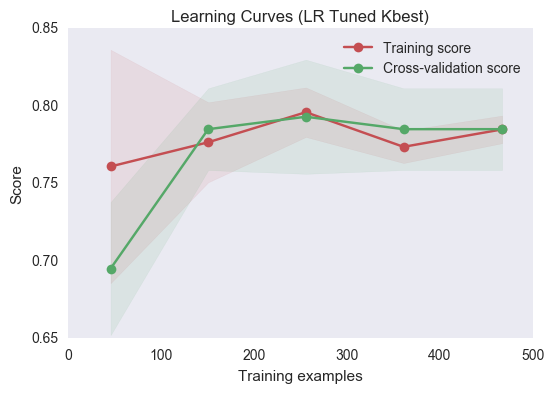

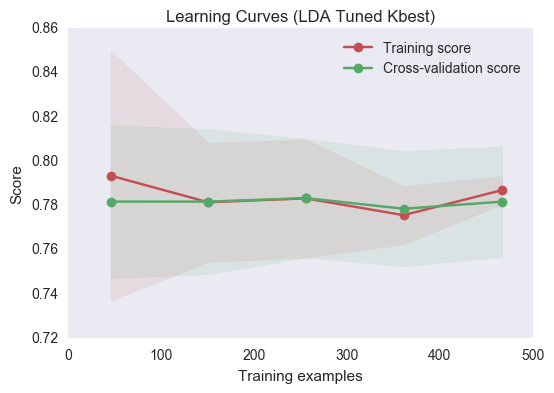

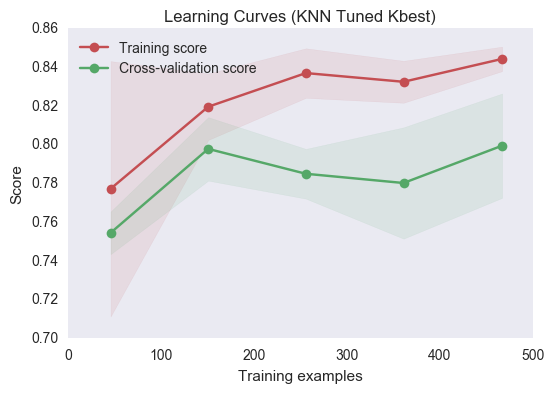

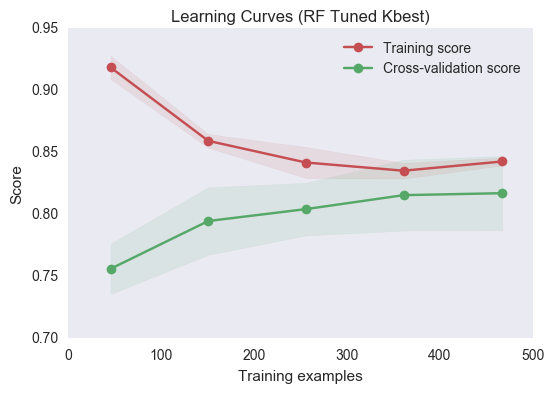

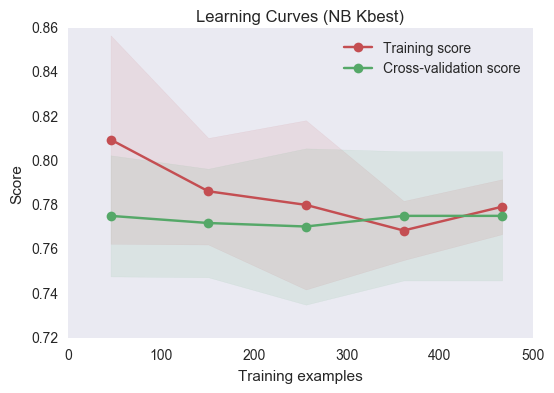

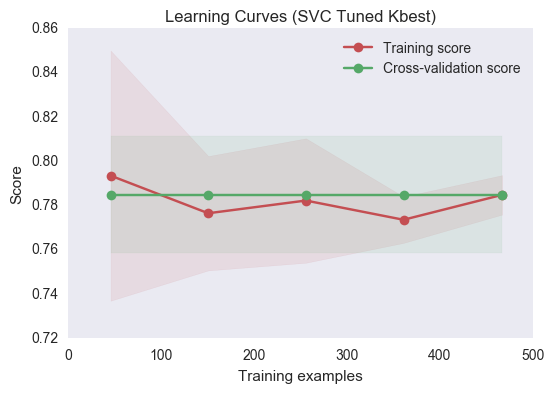

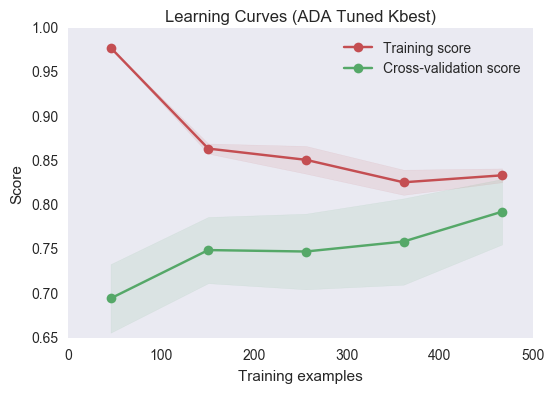

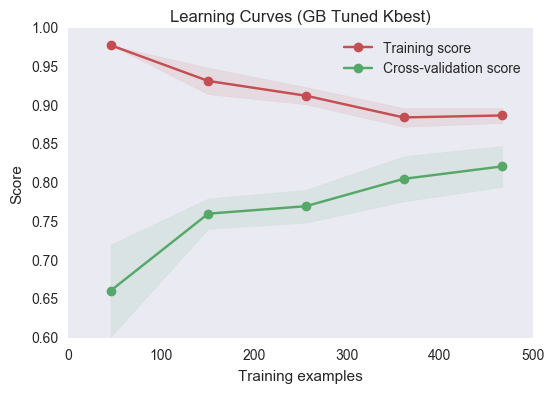

In [321]:
title = "Learning Curves (LR Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(LR_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)


title = "Learning Curves (LDA Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(LDA_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)


title = "Learning Curves (KNN Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(KNN_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)


title = "Learning Curves (RF Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(RF_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)

title = "Learning Curves (NB Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(NB_clf, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)

title = "Learning Curves (SVC Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(SVC_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)

title = "Learning Curves (ADA Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(ADA_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)

title = "Learning Curves (GB Tuned Kbest)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
plot_learning_curve(GB_clf_tuned, title, X_train_scaled_skb, y_train, cv=sss, n_jobs=1)


In [338]:
RF_clf_tuned.fit(X_train_scaled_skb, y_train)
RF_test_pred = RF_clf_tuned.predict(X_test_scaled_skb)
RF_prec_test = precision_score(RF_test_pred, y_test)
RF_recall_test = recall_score(RF_test_pred, y_test)
RF_f1_test = f1_score(RF_test_pred, y_test)
RF_ROC_AUC_test = roc_auc_score(RF_test_pred, y_test)

print("Precision Test: {}".format(RF_prec_test))
print ("Recall Test: {}".format(RF_recall_test))
print ("F1 Test: {}".format(RF_f1_test))
print ("ROC AUC Test: {}".format(RF_ROC_AUC_test))

Precision Test: 0.630630630631
Recall Test: 0.823529411765
F1 Test: 0.714285714286
ROC AUC Test: 0.799742847959


In [337]:
SVC_clf_tuned.fit(X_train_scaled_skb, y_train)
SVC_test_pred = SVC_clf_tuned.predict(X_test_scaled_skb)
SVC_prec_test = precision_score(SVC_test_pred, y_test)
SVC_recall_test = recall_score(SVC_test_pred, y_test)
SVC_f1_test = f1_score(SVC_test_pred, y_test)
SVC_ROC_AUC_test = roc_auc_score(GB_test_pred, y_test)

print("Precision Test: {}".format(SVC_prec_test))
print ("Recall Test: {}".format(SVC_recall_test))
print ("F1 Test: {}".format(SVC_f1_test))
print ("ROC AUC Test: {}".format(SVC_ROC_AUC_test))

Precision Test: 0.702702702703
Recall Test: 0.772277227723
F1 Test: 0.735849056604
ROC AUC Test: 0.807178526841


In [334]:
GB_clf_tuned.fit(X_train_scaled_skb, y_train)
GB_test_pred = GB_clf_tuned.predict(X_test_scaled_skb)
GB_prec_test = precision_score(GB_test_pred, y_test)
GB_recall_test = recall_score(GB_test_pred, y_test)
GB_f1_test = f1_score(GB_test_pred, y_test)
GB_ROC_AUC_test = roc_auc_score(GB_test_pred, y_test)

print("GBC Precision Test: {}".format(GB_prec_test))
print ("GBC Recall Test: {}".format(GB_recall_test))
print ("GBC F1 Test: {}".format(GB_f1_test))
print ("GBC ROC AUC Test: {}".format(GB_ROC_AUC_test))

GBC Precision Test: 0.666666666667
GBC Recall Test: 0.822222222222
GBC F1 Test: 0.73631840796
GBC ROC AUC Test: 0.807178526841


### Scale and Transform Test Data

In [336]:
test_scaled  = scaler.transform(Test_merged)
test_scaled_skb = skb.transform(test_scaled)

y_pred = GB_clf_tuned.predict(test_scaled_skb)
print(y_pred)

# Generate Submission File 
submission = pd.DataFrame({ 'PassengerId': Id,
                            'Survived': y_pred })
submission.to_csv("submission.csv", index=False)

[0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 0 1 1 0 0 1 0 0 0]
